In [1]:
from pearce.mocks.kittens import cat_dict
import numpy as np

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [18]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0, 'scale_factors':[0.658, 1.0]}

In [19]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [20]:
cat.load(2.0/3.0, HOD='abRedMagic')

In [21]:
cat.sf_idxs

array([34, 90])

In [6]:
cat.halocat.halo_table.keys()

['halo_upid',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_rvir',
 'halo_id',
 'halo_vx',
 'halo_vy',
 'halo_vz',
 'halo_rs',
 'halo_mvir',
 'halo_nfw_conc',
 'halo_hostid',
 'halo_local_density',
 'halo_mvir_host_halo']

In [7]:
rand_idxs = np.random.choice(len(cat.halocat.halo_table['halo_nfw_conc']),size = int(1e4), replace = False)
mass_cut = cat.halocat.halo_table['halo_mvir']/cat.pmass >= 1e3

In [8]:
print float(sum(mass_cut))/len(mass_cut)

0.0222693354395


In [9]:
print cat.pmass

591421440.0


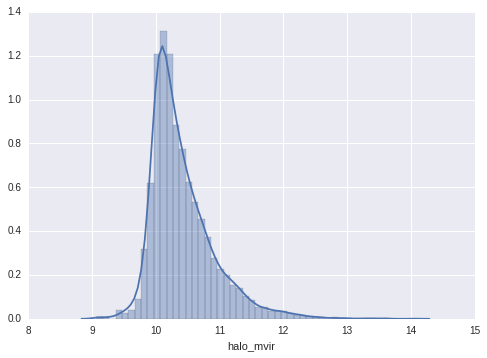

In [10]:
sns.distplot(np.log10(cat.halocat.halo_table['halo_mvir'][rand_idxs]), hist=True, kde=True)

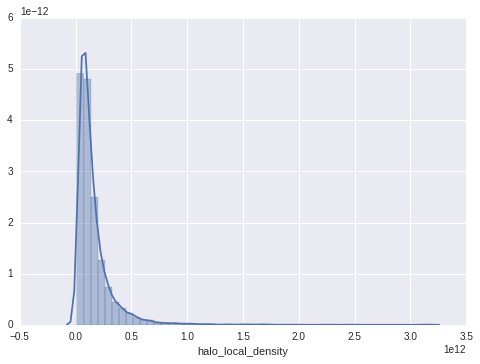

In [11]:
sns.distplot(cat.halocat.halo_table['halo_local_density'][rand_idxs], hist=True, kde=True)

In [12]:
print min(cat.halocat.halo_table['halo_local_density'][rand_idxs])
print max(cat.halocat.halo_table['halo_local_density'][rand_idxs])

9488066679.15
3.16867541131e+12


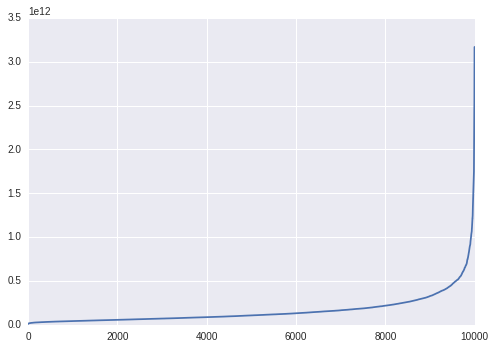

In [13]:
plt.plot(sorted(cat.halocat.halo_table['halo_local_density'][rand_idxs]))

In [14]:
vol = 4*np.pi/3*(5**3)

In [15]:
print sorted(cat.halocat.halo_table['halo_local_density'][rand_idxs]*vol/(100*cat.pmass))[:50]

[84.0, 95.999999999999986, 97.999999999999986, 98.999999999999986, 106.99999999999999, 113.99999999999999, 118.99999999999997, 132.99999999999997, 134.99999999999997, 136.99999999999997, 137.99999999999997, 142.99999999999997, 144.99999999999997, 149.0, 149.99999999999997, 149.99999999999997, 149.99999999999997, 149.99999999999997, 149.99999999999997, 149.99999999999997, 151.0, 152.99999999999997, 155.99999999999997, 157.99999999999997, 157.99999999999997, 157.99999999999997, 158.99999999999997, 159.99999999999997, 161.0, 162.99999999999997, 162.99999999999997, 162.99999999999997, 162.99999999999997, 164.0, 165.99999999999994, 166.99999999999994, 168.0, 168.0, 168.99999999999994, 171.0, 171.99999999999994, 171.99999999999994, 173.99999999999994, 173.99999999999994, 175.0, 175.0, 175.0, 175.99999999999994, 176.99999999999994, 178.99999999999994]


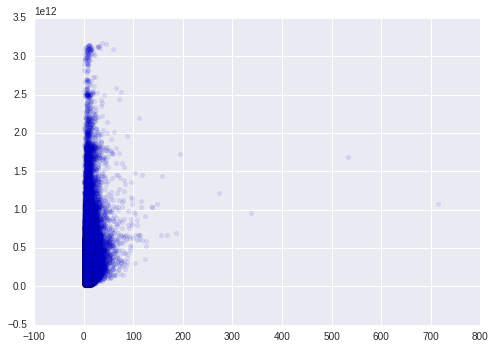

In [16]:
plt.scatter(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         cat.halocat.halo_table['halo_local_density'][mass_cut], alpha=0.1)

In [16]:
sns.jointplot(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         cat.halocat.halo_table['halo_local_density'][mass_cut], kind = 'hex', space=0)

KeyboardInterrupt: 

In [ ]:
from scipy.stats import pearsonr
print pearsonr(cat.halocat.halo_table['halo_nfw_conc'][rand_idxs],\
         cat.halocat.halo_table['halo_local_density'][rand_idxs])[0]

In [ ]:
cat.model.sec_haloprop_key = 'halo_local_density'

In [ ]:
cat.model.param_dict

In [ ]:
fiducial_point = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}

In [ ]:
cat.model._input_model_dictionary['centrals_occupation']._get_assembias_param_dict_key(0)

In [ ]:
fiducial_point['mean_occupation_centrals_assembias_param1'] = 1.0
fiducial_point['mean_occupation_satellites_assembias_param1'] = -1.0

In [ ]:
#hod_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
#                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
hod_params = dict(fiducial_point)
cat.populate(hod_params)

In [ ]:
cat.model.param_dict

In [ ]:
cat.calc_number_density()

In [ ]:
pi_max = 40.
rp_bins = np.logspace(-1,1.25,15)
rp_points = (rp_bins[1:]+rp_bins[:-1])/2

In [ ]:
wp_vals = []
for i in xrange(10):
    cat.populate(hod_params)
    wp_vals.append(cat.calc_wp(rp_bins, pi_max))
wp_vals = np.array(wp_vals)

In [ ]:
wp_vals.shape

In [ ]:
wp = wp_vals.mean(axis=0)
cov = np.cov(wp_vals, rowvar=False)/np.sqrt(10)

In [ ]:
plt.plot(rp_points, wp)
plt.loglog()
plt.show()

In [ ]:
theta_bins = np.logspace(-2,0,15)
theta_points = (theta_bins[:-1]+theta_bins[1:])/2.0
wt = cat.calc_wt(theta_bins)

In [ ]:
plt.plot(theta_points, wt)
plt.loglog()
plt.show()

In [ ]:
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987])#, 7.29722764, \
           #10.24533859,  14.38449888,  20.1958975])# , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2
jk_args= {'n_rands':3, 'n_sub':3}

In [ ]:
#%%timeit
#try another estimator?
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [ ]:
errs = np.sqrt(np.diag(cov))
print errs

In [ ]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()

In [ ]:
#%%timeit
#try another estimator?
jk_args= {'n_rands':50, 'n_sub':3}
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [ ]:
errs = np.sqrt(np.diag(cov))
print errs

In [ ]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()